In [45]:
# Question 1 K Nearest Neighbour algorithm on Iris Dataset 
# reading the file as csv file 
import pandas as pd
import numpy as np 
import math 
import matplotlib.pyplot as plt
import operator
from scipy.stats import norm 

datafile = pd.read_csv('C:/data/irisdata.csv')
attributes  = ["sepal_length","sepal_width","petal_length","petal_width","species"]
datafile.columns = attributes
print(datafile)
# Normalisation
df = datafile[datafile.columns[4:5]]
datafile.pop("species")
norm_data = (datafile-datafile.min())/(datafile.max()-datafile.min())
datafile2 = pd.concat([norm_data,df],axis=1)
Iris = pd.concat([datafile,df],axis = 1)
#eucladian distances for normalised data
def eucladian_distance(instances1,instances2,length):
    distance = 0
    for i in range(length):
        distance +=pow((instances1[i]-instances2[i]),2)
        
    return math.sqrt(distance)
# defining nearest neighbour function 
def knn(trainingset ,testinstances ,k):
    distances =[] 
    sort = []
    for i in range(len(testinstances)):
        dist = eucladian_distance(testinstances,trainingset[i],length)
        distances.append((trainingset[i],dist))
    neighbours=[]
    distances.sort(key = operator.itemgetter(1))
    for j in range(k):
        neighbours.append(distances[j][0])
    return neighbours
 
import operator
def getresponse(neighbours):
    classvotes={}
    for i in range(len(neighbours)):
        response = neighbours[i][-1]
        if response in classvotes:
            classvotes[response]+=1
        else:
            classvotes[response]=1
    sortedvotes = sorted(classvotes.iteritem(),key = operator.itemgetter(1),reverse = True)
    return sortedvotes[0][0]
# defining accuracy function
def accuracy(testinstances ,prediction):
    correct = 0
    for i in range (len(testinstances)):
        if testinstances[i][-1] is predictions[i]:
            correct  +=1
    return (correct/float(len(testinstances)))*100.0
k =5
test1=[[5.1,2.5,3.2,4.3]] # this is first test sample
n,r=knn(Iris,test1,k)
print('the class is:',n)
print('the nearest neighbour is :',r)
test2=[[4.9,3,1.4,0.2]]
n,r=knn(Iris,test2,k)
print('the class is:',n)
print('the nearest neighbour is :',r)
test3=[[6,3,4.8,1.8]]
n,r=knn(Iris,test3,k)
print('the class is:',n)
print('the nearest neighbour is :',r)





     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


[0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 1 0]
[1 0 2 0 1 1 2 2 0 0 2 0 2 0 1 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 0 0 2 0 0 0 0
 0 2 1 2 2 2 2 2 2 0 2 0 1 2 1 0 1 1 2 0 2 0 1 0 2 0 2 2 2 0 1 0 2 2 2 0 2
 2 0 2 2 1 0 1 2 1 1 0 2 1 2 0 0 2 1 0 2 2 2 1 1 2 2 0 1 0 1 2 1 1 2 0 2 2
 2 1 0 1 2 0 1 1 2 2 1 2 1 1 1 1 2 1 2 0 2 2 1 0 2 2 0 2 0 0 2 2 2 2 2 0 2
 0 0 0 2 0 2 1 2 0 2 1 2 0 2 2 1 2 2 2 2 1 2 2 0 1 2 2 0 1 1 2 2 1 2 2 2 2
 2 2 2 1 0 2 2 

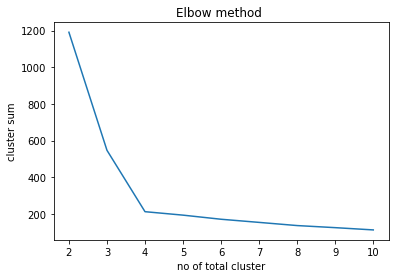

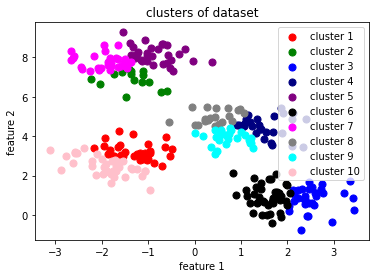

In [23]:
 # question 2 K means algorithm 
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

datafile = pd.read_csv('C:/data/dataset.csv')
datafile
df= datafile.iloc[:,[1,2]].values
c_sum = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    c_sum.append(kmeans.inertia_)
    x = kmeans.fit_predict(df)
    print(x)
# Elbow plot
plt.plot(range(2,11),c_sum)
plt.title("Elbow method ")
plt.xlabel('no of total cluster')
plt.ylabel('cluster sum')
plt.show()
# plotting the clusters 
plt.scatter(df[x==0,0],df[x ==0,1],s=50,c='red',label='cluster 1')
plt.scatter(df[x==1,0],df[x ==1,1],s=50,c='green',label='cluster 2')
plt.scatter(df[x==2,0],df[x ==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(df[x==3,0],df[x ==3,1],s=50,c='navy',label='cluster 4')
plt.scatter(df[x==4,0],df[x ==4,1],s=50,c='purple',label='cluster 5')
plt.scatter(df[x==5,0],df[x ==5,1],s=50,c='black',label='cluster 6')
plt.scatter(df[x==6,0],df[x ==6,1],s=50,c='magenta',label='cluster 7')
plt.scatter(df[x==7,0],df[x ==7,1],s=50,c='gray',label='cluster 8')
plt.scatter(df[x==8,0],df[x ==8,1],s=50,c='cyan',label='cluster 9')
plt.scatter(df[x==9,0],df[x ==9,1],s=50,c='pink',label='cluster 10')
plt.title('clusters of dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()
